In [1]:
# Prosessing libs
import pandas as pd
import os
import numpy as np
from fastparquet import ParquetFile
import glob

# PySpark
from pyspark.sql import SparkSession
from pyspark.sql import functions as psf

# Visualisation libs
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime


In [2]:
# change memory allocation for pyarrow
# os.environ['PYARROW_MEMORY_POOL_MAX_CHUNKSIZE'] = '3000000000'
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = "notebook"
# os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
# os.environ['PYSPARK_PYTHON'] = sys.executable

## Get the path of all files

In [3]:
start_time = datetime.now()
print("Start time: ", start_time)
os.getcwd()

Start time:  2023-09-14 20:45:07.059389


'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats\\notebooks-contributions'

In [4]:
os.chdir("..")


In [5]:
home_dir = os.getcwd()
parquet_dir = os.path.join(home_dir, r"oshdb-contributions-parquet-data-test")
parquet_dir

parquet_dir = r"E:\Rafael-data\type=way\state=latest"


In [6]:
files = glob.glob(f'{parquet_dir}\\**\\*.parquet', recursive=True)
files


['E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_0.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_1.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_10.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_11.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_2.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_3.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_4.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_5.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_6.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_7.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_8.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_9.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2018\\data_0.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2018\\data_1.parquet',
 'E:

In [7]:
# os.chdir("..")
# home_dir = os.getcwd()
# parquet_dir_node = os.path.join(home_dir, r"oshdb-contributions-parquet-data\type=node")
# parquet_dir = os.path.join(home_dir, r"oshdb-contributions-parquet-data")
# duckdb_dir = os.path.join(home_dir, r"notebooks-contributions\duckdb")
# test_dir = os.path.join(home_dir, r"oshdb-contributions-parquet-data\type=node\year=2023")


In [8]:
# files = glob.glob(f'{parquet_dir}\\**\\*.parquet', recursive=True)
# files


In [9]:
# files_location_lst = []

# for (path_dir, folder_names, file_names) in os.walk(parquet_dir_node):
#     for file_name in file_names:
#         if file_name.endswith(".parquet"):
#             file_location = os.path.join(path_dir, file_name)
#             files_location_lst.append(file_location)
# files_location_lst


## Load the all data with Apache PySpark

In [10]:
spark = SparkSession.builder.appName("ReadParquetFiles").getOrCreate()

df = spark.read.parquet(*files)

# df.show()


In [11]:
# df.count()

In [12]:
# spark.stop()

In [13]:
# df.describe().show()

In [14]:
# df.na.drop(how="any",subset=["building_area"]).show()

### Data transformation, Data types conversion

In [15]:
# Cast the 'changeset_timestamp' column to a LongType
df = df.withColumn('changeset_timestamp', psf.col(
    'changeset_timestamp').cast('long'))

# Use the 'changeset_timestamp' column to create a new 'datetime' column
df = df.withColumn('datetime', psf.from_unixtime(
    psf.col('changeset_timestamp')/1000, 'yyyy-MM-dd HH:mm:ss.SSSSSS'))

# Show the resulting DataFrame
# df.show()


In [16]:
# Use the 'changeset_timestamp' column to create a new 'datetime' column
df = df.withColumn('y_m', psf.from_unixtime(
    psf.col('changeset_timestamp')/1000, 'yyyy-MM'))

# Create a new column called 'year' containing the year from the 'datetime' column
df = df.withColumn('year', psf.year('datetime'))



# Show the resulting DataFrame
# df.show()


In [17]:
# Convert the 'tags' column to a string for filtering
df = df.withColumn("tags_str", df.tags.cast("string"))
df = df.withColumn("road_str", df.road.cast("string"))

In [18]:
str(df.columns)

"['contrib_id', 'valid_from', 'valid_to', 'osm_id', 'osm_version', 'changeset_id', 'changeset_timestamp', 'hashtags', 'editor', 'user_id', 'tags', 'tags_delta', 'primary_feature', 'building', 'road', 'is_area', 'area', 'area_delta', 'length', 'length_delta', 'contrib_type', 'country_iso_a3', 'country', 'centroid', 'geometry_type', 'geometry_valid', 'geometry', 'state', 'type', 'datetime', 'y_m', 'year', 'tags_str', 'road_str']"

In [19]:
# df.count()

In [20]:
# df.groupBy("road").count().show()

In [21]:
# df.groupBy("state").count().show()

In [22]:
df = df.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


In [23]:
# df.groupBy("building").count().show()

In [24]:
df.columns

['contrib_id',
 'valid_from',
 'valid_to',
 'osm_id',
 'osm_version',
 'changeset_id',
 'changeset_timestamp',
 'hashtags',
 'editor',
 'user_id',
 'tags',
 'tags_delta',
 'primary_feature',
 'building',
 'road',
 'is_area',
 'area',
 'area_delta',
 'length',
 'length_delta',
 'contrib_type',
 'country_iso_a3',
 'country',
 'centroid',
 'geometry_type',
 'geometry_valid',
 'geometry',
 'state',
 'type',
 'datetime',
 'y_m',
 'year',
 'tags_str',
 'road_str',
 'hashtags_un']

In [25]:
# df.count()

In [26]:
# df.show()

In [27]:
# Try to identify Vietnam abbretiation

#df_V = df.filter(psf.col("country").startswith("V"))
# df_V.groupBy("country").count().show()

# Create temporary view
#df_V.createOrReplaceTempView("TAB")
# spark.sql("SELECT DISTINCT * FROM TAB").show()
#spark.sql("SELECT DISTINCT country FROM TAB").show()


In [28]:
# Get the last edit
# max_date = df.selectExpr("max(datetime)").collect()
# max_date[0]


# Number of created buildings

### Data wrangling – buildings
- select all buildings (col building) with 1 value and NULL value
- use groupBy to count the last record of the users → the number of buildings

In [29]:
# df.groupBy("building").count().show()

In [30]:
df_blds_created = df.filter(psf.col('building').isin([1]) | psf.col('building').isNull()) # | psf.col('building').isNull()


In [31]:
# df_blds_created.show()

In [32]:
# df_blds = df.filter(df.building.contains(1) | df.building.contains(0) | df.building.isNull())


In [33]:
# df_blds.show()

In [34]:
# df_blds.groupBy("building").count().show()


In [35]:
df_blds_created = df_blds_created.groupBy("osm_id", "editor", "country", "tags_str", "hashtags", "year").agg(psf.last("datetime").alias("datetime"))

In [36]:
# df_blds.show()

In [37]:
# df_blds.show()

In [38]:
df_blds_created = df_blds_created.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


## Building filter

### Filter for numbers of  created buildings
- column tag_str contains 'building' to filter all buildings

In [39]:
df_all_blds_created = df_blds_created.filter(df_blds_created.tags_str.contains("building"))
# df_all_blds_created.show()

In [40]:
# World
df_all_blds_created_world = df_all_blds_created.groupBy("year").count().withColumnRenamed("count", "df_all_blds_created_world").toPandas()
df_all_blds_created_world


,year,df_all_blds_created_world
0,2018,49162957
1,2023,18980027
2,2022,52291372
3,2019,35939305
4,2020,45508390
5,2017,37991492
6,2021,54107309


In [41]:
# Selected countries
df_all_blds_created_country = df_all_blds_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_blds_created_country = df_all_blds_created_country.groupBy("year", "country").count().withColumnRenamed("count", "df_all_blds_created_country").toPandas()
df_all_blds_created_country

,year,country,df_all_blds_created_country
0,2018,VNM,166872
1,2022,USA,8780802
2,2017,NGA,361751
3,2022,NGA,2873263
4,2019,NGA,826906
5,2019,VNM,70368
6,2022,CZE,101843
7,2023,DEU,590903
8,2018,NGA,647450
9,2017,USA,4961834


In [42]:
# # USA - USA
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count().withColumnRenamed("count", "df_all_blds_created_country_USA")
# df_all_blds_created_country_USA = df_all_blds_created_country.filter("country == 'USA' OR country == 'CZE'").toPandas()  # psf.col("country") == "USA" | psf.col("country") == "CZE"
# df_all_blds_created_country_USA


In [43]:
# # Nigeria - NGA
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_NGA = df_all_blds_created_country.filter(df_all_blds_created_country.country == "NGA").toPandas()
# df_all_blds_created_country_NGA

In [44]:
# # Vietnam - VNM
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_VNM = df_all_blds_created_country.filter(df_all_blds_created_country.country == "VNM").toPandas()
# df_all_blds_created_country_VNM

In [45]:
# # Germany - DEU
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_DEU = df_all_blds_created_country.filter(df_all_blds_created_country.country == "DEU").toPandas()
# df_all_blds_created_country_DEU

In [46]:
# # Czechia - CZE
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_CZE = df_all_blds_created_country.filter(df_all_blds_created_country.country == "CZE").toPandas()
# df_all_blds_created_country_CZE


## AI created buildings filter

### Filter 1
- column tag_str contains 'microsoft/BuildingFootprints' or 'esri/Google_Africa_Buildings'

In [47]:
df_ai_blds_created = df_all_blds_created.filter(
    df_all_blds_created.tags_str.contains("microsoft/BuildingFootprints")
    | df_all_blds_created.tags_str.contains("esri/Google_Africa_Buildings")
    )


In [48]:
# World
df_ai_blds_created_world = df_ai_blds_created.groupBy("year").count().withColumnRenamed("count", "df_ai_blds_created_world").toPandas()
df_ai_blds_created_world


,year,df_ai_blds_created_world
0,2023,2818021
1,2022,6293603
2,2019,10284
3,2020,2083223
4,2021,2787888


In [49]:
# Selected countries
df_ai_blds_created_country = df_ai_blds_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_ai_blds_created_country = df_ai_blds_created_country.groupBy("year", "country").count().withColumnRenamed("count", "df_ai_blds_created_country").toPandas()
df_ai_blds_created_country

,year,country,df_ai_blds_created_country
0,2022,USA,3165885
1,2022,NGA,858169
2,2022,CZE,60
3,2023,DEU,2771
4,2023,USA,1416842
5,2019,USA,10284
6,2021,USA,2454946
7,2021,NGA,29
8,2022,VNM,68
9,2023,NGA,66354


In [50]:
# # USA - USA
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_USA = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "USA").toPandas()
# df_ai_blds_created_country_USA

In [51]:
# # Nigeria - NGA
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_NGA = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "NGA").toPandas()
# df_ai_blds_created_country_NGA

In [52]:
# # Vietnam - VNM
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_VNM = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "VNM").toPandas()
# df_ai_blds_created_country_VNM


In [53]:
# # Germany - DEU
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_DEU = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "DEU").toPandas()
# df_ai_blds_created_country_DEU

In [54]:
# # Czechia - CZE
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_CZE = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "CZE").toPandas()
# df_ai_blds_created_country_CZE

# Number of edited buildings

In [55]:
df_blds_edited = df.filter(psf.col('building').isin([0]) | psf.col('building').isNull()) # | psf.col('building').isNull()


In [56]:
# df_blds = df.filter(df.building.contains(1) | df.building.contains(0) | df.building.isNull())


In [57]:
# df_blds.show()

In [58]:
# df_blds.groupBy("building").count().show()


In [59]:
df_blds_edited = df_blds_edited.groupBy("osm_id", "editor", "country", "tags_str", "hashtags", "year").agg(psf.last("datetime").alias("datetime"))


In [60]:
# df_blds.show()

In [61]:
# df_blds.show()

In [62]:
df_blds_edited = df_blds_edited.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


## Building filter

### Filter for numbers of  edited buildings
- column tag_str contains 'building' to filter all buildings

In [63]:
df_all_blds_edited = df_blds_edited.filter(df_blds_edited.tags_str.contains("building"))


In [64]:
# World
df_all_blds_edited_world = df_all_blds_edited.groupBy("year").count().withColumnRenamed("count", "df_all_blds_edited_world").toPandas()
df_all_blds_edited_world

,year,df_all_blds_edited_world
0,2018,12477319
1,2023,10891364
2,2022,28914498
3,2019,17136762
4,2020,21364175
5,2017,11267476
6,2021,29564306


In [65]:
# Selected countries
df_all_blds_edited_country = df_all_blds_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_blds_edited_country = df_all_blds_edited_country.groupBy("year", "country").count().withColumnRenamed("count", "df_all_blds_edited_country").toPandas()
df_all_blds_edited_country

,year,country,df_all_blds_edited_country
0,2018,VNM,50278
1,2022,USA,2781438
2,2017,NGA,31970
3,2022,NGA,974374
4,2019,NGA,61177
5,2019,VNM,30482
6,2022,CZE,258890
7,2023,DEU,1356531
8,2018,NGA,73748
9,2017,USA,809578


In [66]:
# # USA - USA
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_USA = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "USA").toPandas()
# df_all_blds_edited_country_USA

In [67]:
# # Nigeria - NGA
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_NGA = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "NGA").toPandas()
# df_all_blds_edited_country_NGA

In [68]:
# # Vietnam - VNM
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_VNM = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "VNM").toPandas()
# df_all_blds_edited_country_VNM


In [69]:
# # Germany - DEU
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_DEU = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "DEU").toPandas()
# df_all_blds_edited_country_DEU

In [70]:
# # Czechia - CZE
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_CZE = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "CZE").toPandas()
# df_all_blds_edited_country_CZE

## AI edited buildings filter

### Filter 1
- column tag_str contains 'microsoft/BuildingFootprints' or 'esri/Google_Africa_Buildings'

In [71]:
df_ai_blds_edited = df_all_blds_edited.filter(
    df_all_blds_edited.tags_str.contains("microsoft/BuildingFootprints")
    | df_all_blds_edited.tags_str.contains("esri/Google_Africa_Buildings")
    )


In [72]:
# World
df_ai_blds_edited_world = df_ai_blds_edited.groupBy("year").count().withColumnRenamed("count", "df_ai_blds_edited_world").toPandas()
df_ai_blds_edited_world


,year,df_ai_blds_edited_world
0,2023,464308
1,2022,933020
2,2019,16
3,2020,78853
4,2021,207966


In [73]:
# Selected countries
df_ai_blds_edited_country = df_ai_blds_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_ai_blds_edited_country = df_ai_blds_edited_country.groupBy("year", "country").count().withColumnRenamed("count", "df_ai_blds_edited_country").toPandas()
df_ai_blds_edited_country

,year,country,df_ai_blds_edited_country
0,2022,USA,555963
1,2022,NGA,195584
2,2023,DEU,338
3,2023,USA,244275
4,2019,USA,16
5,2021,USA,170464
6,2023,NGA,2739
7,2020,USA,60426
8,2022,DEU,450
9,2023,VNM,29


In [74]:
# # USA - USA
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_USA = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "USA").toPandas()
# df_ai_blds_edited_country_USA


In [75]:
# # Nigeria - NGA
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_NGA = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "NGA").toPandas()
# df_ai_blds_edited_country_NGA

In [76]:
# # Vietnam - VNM
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_VNM = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "VNM").toPandas()
# df_ai_blds_edited_country_VNM

In [77]:
# # Germany - DEU
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_DEU = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "DEU").toPandas()
# df_ai_blds_edited_country_DEU

In [78]:
# # Czechia - CZE
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_CZE = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "CZE").toPandas()
# df_ai_blds_edited_country_CZE

# Length of created roads

### Data wrangling – roads
- select distinct osm_id
- remove all -1
- then use groupby (osm_id) and function last (time column)

In [79]:
df_roads_created = df.filter(psf.col('road').isin([1]) | psf.col('road').isNull()) # | psf.col('road').isNull()

In [80]:
# df_roads = df.filter(~psf.col('road').isin([-1, 0]))

In [81]:
df_all_roads_created = df_roads_created.groupBy(
    "osm_id", "editor", "length", "country", "tags_str", "hashtags", "year", "road").agg(psf.last("datetime").alias("datetime"))


In [82]:
# df_roads.show()

In [83]:
df_roads_created = df_roads_created.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


In [84]:
# df_roads.groupBy("hashtags_un").count().show()


In [85]:
# df_roads.show()

In [86]:
df_all_roads_created = df_roads_created.filter(
    df_roads_created.tags_str.contains("highway"))


## Road filter

### Filter for the length of all roads
- column tag_str contains motorway, trunk, motorway_link, trunk_link, primary, primary_link, secondary, secondary_link, tertiary, tertiary_link, unclassified, residential

In [87]:
df_main_roads_created = df_all_roads_created.filter(
    df_all_roads_created.tags_str.contains("motorway")\
    | df_all_roads_created.tags_str.contains("trunk")\
    | df_all_roads_created.tags_str.contains("motorway_link")\
    | df_all_roads_created.tags_str.contains("trunk_link")\
    | df_all_roads_created.tags_str.contains("primary")\
    | df_all_roads_created.tags_str.contains("primary_link")\
    | df_all_roads_created.tags_str.contains("secondary")\
    | df_all_roads_created.tags_str.contains("secondary_link")\
    | df_all_roads_created.tags_str.contains("tertiary")\
    | df_all_roads_created.tags_str.contains("tertiary_link")\
    | df_all_roads_created.tags_str.contains("unclassified")\
    | df_all_roads_created.tags_str.contains("residential")\
    )


#### All roads

In [88]:
# World – all roads
df_all_roads_created_world = df_all_roads_created.groupBy("year").sum().toPandas()
df_all_roads_created_world


,year,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2018,8594363952888368,15256670740187286,9223372036844807819,5198320232612727,14911795,602463101507605,-3190070845380979616,41911246281694,6775320,-74,2631780,136574658,22613512,2879284901,1250538979,20115401802
1,2017,5713431217841164,10218218000152396,9223372036847963045,2968126735182474,10325253,342344802501625,-8228523455800102616,16863817845088,4543953,-59,1500892,124249247,46537893,2143822050,1251797408,13741342971
2,2019,11972645505413222,22630084017813696,-14470196,8811207964335734,22155139,1053637653354090,4183342383879998384,85497268011763,9595413,-80,3333288,177649544,-11590002,4155192367,2069975220,29215325724
3,2020,18118372848490778,36629850326200213,-22970460,16286002434902777,35719542,2022750692543625,-263634893173550232,159598010346022,15356186,13,5363702,284661002,-101865743,6204721540,3340960235,46400329200
4,2021,23537518959648798,45133087538616837,9223372036826993957,21655248820781186,48862310,2959702781059623,8239604951538868768,204825258170198,16459549,-94,5589362,347800067,-767866712,7346844414,3592487735,56147120871
5,2022,26067979862394911,43188047662907470,9223372036828717915,21344832197560253,55085093,3216288815466150,6294566771294942768,188715703590260,13020561,-399,4660558,829606122,90694195,7068196446,2943256286,52689059646
6,2023,12114907490434141,19132268420859719,-11398814,9768484559110054,26390713,1521585453347875,685528084530032384,88888274068027,5262378,-122,1693878,310812905,38673401,3140933945,1182682228,23059800722


In [89]:
# Selected countries – all roads
df_all_roads_created_country = df_all_roads_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_roads_created_country = df_all_roads_created_country.groupBy("year", "country").sum().toPandas()
df_all_roads_created_country

,year,country,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2017,NGA,54971987424900,239806139844188,-159384,82495638512021,175716,8255131156733,239806143455218000,802674800427,147204,NaN,136267,30936,74,69326458,59939496,321477528
1,2017,USA,924954801171894,1538074249069807,-1025870,425678651861017,1529738,51359355549734,1538074620295075000,2589320401453,688168,-21.0,106843,7290456,4174259,243330682,111244686,2069179790
2,2017,DEU,704925635575932,831099598755748,9223372036854221417,184434348609360,1180622,27725955537595,831099853903091000,904838963411,236011,-15.0,14853,4815769,-675034,91897345,19563902,1118206647
3,2017,VNM,3247902699921,7857986167470,9223372036854770569,2503147510990,6382,263352711247,7857986867471000,14836718914,4449,NaN,2871,69250,47893,1114086,958152,10567063
4,2017,CZE,117728502407802,146905547564077,-97952,39486468957057,165425,4919282454498,146905570911020000,135228626481,52066,-1.0,5241,426077,147153,18317498,6168594,197569184
5,2018,USA,2085284646562867,2975457234422705,9223372036852830323,1027301215426727,2687406,116814356746178,2975457688252627000,9260927292042,1383426,190.0,138541,13383069,6190291,308585447,155810608,3925988730
6,2018,DEU,823130457199412,955217586982463,-623962,241690244385646,1388154,37782964538535,955217832302156000,1442248172779,252250,-17.0,19031,20642231,6177662,101761289,20480215,1259155316
7,2018,VNM,51034852983762,84840419462600,9223372036854720435,32693096768545,60688,3374197439448,84840426629538000,368792652765,50062,2.0,31292,102006,90240,5677633,4999409,111742714
8,2018,NGA,205827451495849,547879937786199,-359848,204887389089197,383063,20757048110040,547879941484480000,2623402698057,342811,NaN,332490,4873,2525,71753352,60813518,726173264
9,2019,USA,3178303338476284,5360997758257833,9223372036851354589,2252993733043898,4397958,253560706078882,5360998077808028000,25852215243805,2696705,-12.0,169866,17963942,8358466,528353731,340111018,6907441161


#### Main roads

In [90]:
# World – main roads
df_main_roads_created_world = df_main_roads_created.groupBy("year").sum().toPandas()
df_main_roads_created_world


,year,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2018,1545510493292793,4055650463154925,-2650084,1559676837229640,2961614,159999960439428,4055650965002598000,14244151777424,2476271,-13,2631780,47637044,13473635,849477809,731372501,5347869512
1,2017,819198128432257,2289760755716939,-1525478,759936853422110,1745006,77226113751730,2289761193591384000,4604729352090,1389557,2,1500892,67554636,30756411,590285275,511362400,3076889126
2,2019,1808630911939842,5243488895270636,9223372036851420921,2308271151569792,3799664,242921544953474,5243489325865829000,23048612274833,3112385,-3,3333288,46184530,3139858,1070935637,948132866,6773516853
3,2020,2572136988874364,8607559453241527,-5400128,4332014246852706,6076322,473391943989530,8607559819417096000,42649914846867,5051185,58,5363702,81194592,1305875,1659986169,1477765066,10908258560
4,2021,2982217887111514,9197042753257488,-5660948,5247466885273880,6540867,603438544148713,9197043050506565000,47882638701658,5236656,-7,5589362,90135347,-4476867,1776437139,1552792450,11440775908
5,2022,2979154692118459,7911874318177450,-4775026,4938041745584607,5773823,588287052050461,7911874581351414000,41712300629879,4365054,-8,4660558,80698280,-31715327,1555578362,1340493755,9655102572
6,2023,1246180900260136,2992069279747127,-1782770,1959771012182396,2379482,237875462365428,2992069457110674000,16030012953840,1579996,-9,1693878,102778814,6015985,608504418,481145392,3606543710


In [91]:
# Selected countries – main roads
df_main_roads_created_country = df_main_roads_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_roads_created_country = df_main_roads_created_country.groupBy("year", "country").sum().toPandas()
df_main_roads_created_country

,year,country,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2017,NGA,48545729783420,205139104017882,-136272,71045795755840,146708,7092940660186,205139106930234000,708071219614,128892,NaN,136267,0,0,54526988,49341912,274860624
1,2017,USA,83820225196759,160931729318804,-107300,51562212254149,125778,5390280640334,160931763744121000,249384709895,99365,-1.0,106843,276472,253677,34108541,28272552,216424100
2,2017,VNM,1360354439861,4307372385078,9223372036854772937,1443393856411,3013,144699218602,4307372751515000,7110950410,2774,NaN,2871,0,0,629223,609751,5790807
3,2017,DEU,21028803604145,25922334578915,-17292,7818847667228,25833,864624424912,25922344253752000,22287759997,12116,-3.0,14853,1427167,-623759,1903579,1345570,34877964
4,2017,CZE,5669248967949,7912183294767,-5276,2526531684750,6276,264775344699,7912184226357000,6252475068,4773,0.0,5241,613,150,676264,539504,10641692
5,2018,USA,121069152995662,215580379872378,9223372036854635045,81943159719580,162377,8553522831562,215580445196626000,581093154759,130738,1.0,138541,2057466,1768595,35425205,30389061,284059734
6,2018,NGA,191212821512280,506060138945863,9223372036854443315,189285434663957,345963,19120247336722,506060142273170000,2437274249710,324003,NaN,332490,0,0,59616012,53998292,670970874
7,2018,DEU,28635654740864,35770411812914,-23354,12988322428816,32707,1420227320589,35770420587144000,41729561041,16489,-1.0,19031,13129240,9249121,2259699,1691647,47128372
8,2018,VNM,27361299629982,47949038043716,9223372036854744509,18890373478681,32381,1905127821518,47949038524436000,214039150485,30596,NaN,31292,0,0,3265117,3146899,63161382
9,2018,CZE,4813693599536,7155625588700,-4674,2616730151650,5793,283079337843,7155626284822000,9632092695,4058,NaN,4622,19454,10026,682860,537959,9432132


In [92]:
# # USA - USA
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "USA").show()

In [93]:
# # Nigeria - NGA
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "NGA").toPandas()

In [94]:
# # Vietnam - VNM
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "VNM").show()

In [95]:
# # Germany - DEU
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "DEU").toPandas()

In [96]:
# # Czechia - CZE
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "CZE").show()

## AI road filter

### Filter 1
- column tags contains “#mapwithai” or “#nsroadimport” or "#MapWithAI"

In [97]:
# df_roads_f1_created = df_all_roads_created.filter(\
#     df_all_roads_created.tags_str.contains("mapwithai")\
#     | df_all_roads_created.tags_str.contains("MapWithAI")\
#     | df_all_roads_created.tags_str.contains("nsroadimport")\
#     )


In [98]:
# df_roads_f1_created.groupBy("year").sum().show()


### Filter 2
- column tags_str contains (#nsroadimport" or "mapwithai" or “MapWithAI") and "highway"
OR
- column hashtags_un contains (#nsroadimport" or "mapwithai") and it is highway (from column tags_str ???)

In [99]:
# df_roads_f2_created = df_all_roads_created.filter(\
#     (
#         (df_all_roads_created.tags_str.contains("mapwithai")\
#         | df_all_roads_created.tags_str.contains("MapWithAI")\
#         | df_all_roads_created.tags_str.contains("nsroadimport"))\
#         & (df_all_roads_created.tags_str.contains("highway")))\
#         |\
#         (df_all_roads_created.hashtags_un.contains("mapwithai")\
#         | df_all_roads_created.hashtags_un.contains("nsroadimport")\
#         & (df_all_roads_created.tags_str.contains("highway")))\
#     )


In [100]:
# df_roads_f2_created.groupBy("year").sum().show()


### Filter 3
3_1 – column editor contains RapiD

3_2 – column editor contains RapiD or column tags_str/hashtags_un contains mapwithai

3_3 – column editor contains RapiD and column tags_str/hashtags_un contains mapwithai

#### F3_1

In [101]:
# df_roads_f3_1_created = df_all_roads_created.filter(df_all_roads_created.editor.contains("RapiD"))


In [102]:
# df_roads_f3_1_created.groupBy("year").sum().show()


#### F3_2

In [103]:
df_all_ai_roads_f3_2_created = df_all_roads_created.filter(
    df_all_roads_created.editor.contains("RapiD")\
    | df_all_roads_created.tags_str.contains("mapwithai")\
    | df_all_roads_created.tags_str.contains("MapWithAI")\
    | df_all_roads_created.tags_str.contains("nsroadimport")\
    | df_all_roads_created.hashtags_un.contains("#mapwithai")\
    | df_all_roads_created.hashtags_un.contains("#nsroadimport")\
    | df_all_roads_created.hashtags_un.contains("#MapWithAI")\
)


In [104]:
df_main_ai_roads_f3_2_created = df_main_roads_created.filter(
    df_main_roads_created.editor.contains("RapiD")
    | df_main_roads_created.tags_str.contains("mapwithai")
    | df_main_roads_created.tags_str.contains("MapWithAI")
    | df_main_roads_created.tags_str.contains("nsroadimport")
    | df_main_roads_created.hashtags_un.contains("#mapwithai")
    | df_main_roads_created.hashtags_un.contains("#nsroadimport")
    | df_main_roads_created.hashtags_un.contains("#MapWithAI")
)


#### All AI roads 

In [105]:
# World
df_all_ai_roads_created_world = df_all_ai_roads_f3_2_created.groupBy("year").sum().toPandas()
df_all_ai_roads_created_world


,year,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2017,30456905073928,181201105151543,-120352,62203187003612,125606,6271583878371,181201109237676000,667145831783,115972,NaN,85009,143342,27,35461990,30975235,242749984
1,2018,49132885836835,261841890125474,9223372036854604631,100827560866722,181476,10289383550315,261841892499963000,1170423026337,162920,NaN,107491,87119,-160,57768799,50096725,345435186
2,2019,71357869192518,305636915116163,-194686,139039482101952,226564,14673125986118,305636915507789000,1122564603084,170643,NaN,113269,163511,4841,79371331,59619048,393071034
3,2020,1464836470396036,4355283226405785,-2728808,2196672324277680,3215516,242275909263991,4355283263741869000,25122932073759,2383189,-13.0,1023906,3821888,350156,683366021,517636496,5512192160
4,2021,1443632979110750,4682681377927711,9223372036851892341,2638404822171098,3576582,306147432823494,4682681396630778000,28254042389972,2378526,0.0,1339105,930974,335050,725413368,516996915,5827486807
5,2022,1006478688065147,3059826352301021,9223372036852928969,1881258370557883,2354030,227410096744333,3059826358162994000,17841709283974,1510869,2.0,1115271,4991236,1275760,488173688,363427625,3734308458
6,2023,284475696629292,889370805220245,-530262,578930960570241,731460,70480407490019,889370809174173000,5635194491757,400985,0.0,195445,1818190,275519,166659796,110493575,1072720026


In [106]:
# Selected countries
df_all_ai_roads_created_country = df_all_ai_roads_f3_2_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_ai_roads_created_country = df_all_ai_roads_created_country.groupBy("year", "country").sum().toPandas()
df_all_ai_roads_created_country

,year,country,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2019,USA,10140578732133,23038975306943,-14652,10163728717449,18298,1119669342097,23038975394470000,63752326073,11627,NaN,3350.0,225,11,4493632,3224703,29582388
1,2019,VNM,79955367896,155777657402,9223372036854775709,71640798748,122,7616508711,155777657463000,451164520,90,NaN,85.0,0,0,15473,14679,199881
2,2019,DEU,45183493945,47059389069,-30,13919266590,53,2243609371,47059389071000,139529755,11,NaN,NaN,0,0,3338,805,60570
3,2019,NGA,3499558172309,12251293191435,9223372036854767971,5525371383578,8557,567208003790,12251293196818000,51060970398,7121,NaN,4501.0,0,0,1894269,1568975,15822903
4,2020,USA,670289925165782,1582063803778286,-991622,783313735400957,1148955,87654463705186,1582063808079550000,9798581704409,870281,1.0,11896.0,456483,105633,202905952,150628934,2003076440
5,2020,VNM,115535654659993,458894161152569,9223372036854488435,235961618409173,383472,25658377552865,458894162479489000,2705235621726,230384,NaN,182434.0,1013,40,52956936,23987764,580493460
6,2020,DEU,9603063115198,11876697420898,-7392,5910721344172,9958,702726507504,11876697440145000,70692188793,6343,NaN,25.0,396,0,898779,539985,14931840
7,2020,NGA,3897801603376,12373350772538,9223372036854768015,6194472194036,8233,656936475017,12373350778898000,46371950990,7413,NaN,5201.0,0,-221,2328323,2122802,15741860
8,2020,CZE,55245216676,101260406930,-64,47365064164,83,5201059516,101260406958000,292142583,50,NaN,1.0,0,0,20961,11418,129280
9,2021,USA,464543873678561,1116662760289023,9223372036854086099,584537334588932,887260,71090334043348,1116662764375607000,6974568385286,550267,1.0,11541.0,92479,46071,161634364,103595540,1393901889


#### Main AI roads

In [107]:
# World
df_main_ai_roads_created_world = df_main_ai_roads_f3_2_created.groupBy("year").sum().toPandas()
df_main_ai_roads_created_world


,year,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2017,22154645412932,127985197318696,-85010,44529870516975,85376,4428296227150,127985200681630000,470364426852,84728,NaN,85009,90851,33,18280815,18040150,171465170
1,2018,31624770563676,164443959743129,9223372036854668317,64573305656102,107798,6467943353077,164443961372864000,736872982270,107242,NaN,107491,0,0,23157742,22995229,216916838
2,2019,41887219551073,177709152678336,9223372036854662529,82084829979848,116574,8481682651675,177709152848019000,669400713629,110976,NaN,113269,0,0,33191352,32140140,228710301
3,2020,423702391227768,1634813553641995,-1024280,847495300925107,1058627,90984010939401,1634813577831577000,9203159664158,1002773,NaN,1023906,1691421,7797,222971570,214498292,2069045600
4,2021,556099444475041,2177516893487865,9223372036853436427,1277117636346221,1400680,143680233408657,2177516901358131000,13515400007206,1304255,NaN,1339105,164529,21077,260973775,246825258,2706889001
5,2022,532999361318272,1847970981070021,9223372036853659995,1176700114032474,1170939,137048946598548,1847970984012744000,11625196881221,1079913,NaN,1115271,1020518,27173,234957189,224542533,2256173886
6,2023,93375646021909,328235973887923,9223372036854579999,221728797548710,209533,25940795817469,328235974884565000,2034850317961,188893,NaN,195445,43276,-13118,47104564,43853599,396121607


In [108]:
# Selected countries
df_main_ai_roads_created_country = df_main_ai_roads_f3_2_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_ai_roads_created_country = df_main_ai_roads_created_country.groupBy("year", "country").sum().toPandas()
df_main_ai_roads_created_country

,year,country,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2019,USA,965188711930,5264604789867,9223372036854772457,2428599430665,3948,253816278186,5264604799593000,28416026518,2869,NaN,3350,0,0,1687846,1411945,6765669
1,2019,VNM,59691841644,133751741463,9223372036854775723,63294237826,85,6541222289,133751741517000,310872443,85,NaN,85,0,0,14350,14350,171615
2,2019,NGA,1930008506757,7035999996361,9223372036854771307,3177198323166,4532,325695874894,7036000000004000,28288816968,4476,NaN,4501,0,0,728932,721512,9087519
3,2020,USA,8015611208583,19001895873489,-11920,9404936894944,13878,1045406665021,19001895910558000,105266192529,11233,NaN,11896,9688,7343,3275746,2854128,24078400
4,2020,VNM,82526682880880,291462980611622,9223372036854593359,152350400779736,186720,16352743172208,291462981000300000,1768495325256,179386,NaN,182434,0,0,18162335,17527124,368546980
5,2020,NGA,2329261771810,8247781282327,9223372036854770607,4109192445797,5237,432948486929,8247781287550000,31024297411,5174,NaN,5201,0,0,1247944,1232097,10506020
6,2020,CZE,892134523,1579776286,9223372036854775807,765943441,1,79969519,1579776286000,589904,1,NaN,1,0,0,235,235,2020
7,2020,DEU,29678753131,41600436712,-26,21963878358,27,2372757141,41600436743000,143749056,25,NaN,25,0,0,1466,1274,52520
8,2021,VNM,37201723838270,101982772245199,9223372036854712813,58392126549140,67337,6498374001757,101982772837204000,613997660603,60307,NaN,62976,1896,-7,6731623,6226826,127312895
9,2021,USA,7380545762590,18856916763594,9223372036854764183,10117348089625,14997,1220318157985,18856917095937000,87627454053,10340,NaN,11541,0,0,5112307,3184311,23494125


In [109]:
# # USA - USA
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "USA").show()

In [110]:
# # Nigeria - NGA
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "NGA").toPandas()

In [111]:
# # Vietnam - VN
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "VNM").show()

In [112]:
# # Germany - DEU
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "DEU").toPandas()

In [113]:
# # Czechia - CZE
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "CZE").show()

#### F3_3

In [114]:
# df_roads_f3_3_created = df_all_roads_created.filter(\
#     (df_all_roads_created.editor.contains("RapiD")\
#      & (df_all_roads_created.tags_str.contains("mapwithai")\
#         | df_all_roads_created.hashtags_un.contains("mapwithai")\
#         | df_all_roads_created.tags_str.contains("MapWithAI")\
#         | df_all_roads_created.hashtags_un.contains("MapWithAI")))\
#     )


In [115]:
# df_roads_f3_3_created.groupBy("year").sum().show()


# Length of edited roads

In [116]:
df_roads_edited = df.filter(psf.col('road').isin([0]) | psf.col('road').isNull()) #  | psf.col('road').isNull()

In [117]:
# df_roads = df.filter(~psf.col('road').isin([-1, 0]))

In [118]:
df_roads_edited = df_roads_edited.groupBy("osm_id", "editor", "length", "country", "tags_str", "hashtags", "year", "road").agg(psf.last("datetime").alias("datetime"))


In [119]:
# df_roads.show()

In [120]:
df_roads_edited = df_roads_edited.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


In [121]:
# df_roads.groupBy("hashtags_un").count().show()


In [122]:
# df_roads.show()

In [123]:
df_all_roads_edited = df_roads_edited.filter(
    df_roads_edited.tags_str.contains("highway"))


## Edited roads filter

### Filter for the length of all edited roads
- column tag_str contains motorway, trunk, motorway_link, trunk_link, primary, primary_link, secondary, secondary_link, tertiary, tertiary_link, unclassified, residential

In [124]:
df_main_roads_edited = df_all_roads_edited.filter(
    df_all_roads_edited.tags_str.contains("motorway")\
    | df_all_roads_edited.tags_str.contains("trunk")\
    | df_all_roads_edited.tags_str.contains("motorway_link")\
    | df_all_roads_edited.tags_str.contains("trunk_link")\
    | df_all_roads_edited.tags_str.contains("primary")\
    | df_all_roads_edited.tags_str.contains("primary_link")\
    | df_all_roads_edited.tags_str.contains("secondary")\
    | df_all_roads_edited.tags_str.contains("secondary_link")\
    | df_all_roads_edited.tags_str.contains("tertiary")\
    | df_all_roads_edited.tags_str.contains("tertiary_link")\
    | df_all_roads_edited.tags_str.contains("unclassified")\
    | df_all_roads_edited.tags_str.contains("residential")\
    )


#### All roads

In [125]:
# World – all roads
df_all_roads_edited_world = df_all_roads_edited.groupBy("year").sum().toPandas()
df_all_roads_edited_world


,year,sum(osm_id),sum(length),sum(year),sum(road)
0,2018,4927478382162798,4106076987,23798637240,0
1,2023,11279929407022769,7585282191,36065839677,0
2,2022,23210226572780831,15694718504,75838535268,0
3,2019,8874223740680360,6457956900,36068700084,0
4,2020,17005588394343877,10654019346,59380459340,0
5,2017,2690149190323949,2739057565,15735851404,0
6,2021,22792657032357632,14581742086,74312828846,0


In [127]:
# Selected countries – all roads
df_all_roads_edited_country = df_all_roads_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_roads_edited_country = df_all_roads_edited_country.groupBy("year", "country").sum().toPandas()
df_all_roads_edited_country

,year,country,sum(osm_id),sum(length),sum(year),sum(road)
0,2018,VNM,17803571185984,4140941,66850286,0
1,2022,USA,4136735969508470,2406311651,12753168510,0
2,2017,NGA,37754493727478,83924746,167402932,0
3,2022,NGA,106943582808438,106877152,291851436,0
4,2019,NGA,32253997544297,44967514,115670529,0
5,2019,VNM,28012401047561,7486317,94933380,0
6,2022,CZE,171703599544992,83622878,652072758,0
7,2023,DEU,762285257138474,304386500,3266449088,0
8,2018,NGA,131513761781448,150748250,542771370,0
9,2017,USA,424573255602501,558527384,3321482648,0


#### Main roads

In [128]:
# World – main roads
df_main_roads_edited_world = df_main_roads_edited.groupBy("year").sum().toPandas()
df_main_roads_edited_world


,year,sum(osm_id),sum(length),sum(year),sum(road)
0,2018,1288834986779711,2076269895,9031104950,0
1,2023,3471215860095111,5052852664,16612582665,0
2,2022,6803436120805185,10182100420,32804578194,0
3,2019,2371286927914418,3373700170,13626891213,0
4,2020,5051600206293806,6109283975,23888388700,0
5,2017,481959308563585,1185520790,5071397559,0
6,2021,6384875096850326,9011334811,29606483883,0


In [129]:
# Selected countries – main roads
df_main_roads_edited_country = df_main_roads_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_roads_edited_country = df_main_roads_edited_country.groupBy("year", "country").sum().toPandas()
df_main_roads_edited_country

,year,country,sum(osm_id),sum(length),sum(year),sum(road)
0,2018,VNM,4000847896120,1728425,18268954,0
1,2022,USA,657574080197547,1586340406,4447637706,0
2,2017,NGA,26304650971297,69125276,120786028,0
3,2022,NGA,63365916046688,91499337,204359496,0
4,2019,NGA,17252368844488,33444490,68837805,0
5,2019,VNM,15829882082464,5633984,56727843,0
6,2022,CZE,30197311846475,33280627,204600114,0
7,2023,DEU,172635846107911,123911162,1187778151,0
8,2018,NGA,115911807356208,138610910,487568980,0
9,2017,USA,50456815995633,349305243,1468726958,0


In [130]:
# # World
# df_all_roads_edited.groupBy("year").sum().toPandas()

In [131]:
# # USA - USA
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "USA").show()

In [132]:
# # Nigeria - NGA
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "NGA").toPandas()

In [133]:
# # Vietnam - VN
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "VNM").show()

In [134]:
# # Germany - DEU
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "DEU").toPandas()

In [135]:
# # Czechia - CZE
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "CZE").show()

## AI road filter

### Filter 1
- column tags contains “#mapwithai” or “#nsroadimport” or "#MapWithAI"

In [136]:
# df_roads_f1_edited = df_all_roads_edited.filter(\
#     df_all_roads_edited.tags_str.contains("mapwithai")\
#     | df_all_roads_edited.tags_str.contains("MapWithAI")\
#     | df_all_roads_edited.tags_str.contains("nsroadimport")\
#     )


In [137]:
# df_roads_f1_edited.groupBy("year").sum().show()


### Filter 2
- column tags_str contains (#nsroadimport" or "mapwithai" or “MapWithAI") and "highway"
OR
- column hashtags_un contains (#nsroadimport" or "mapwithai") and it is highway (from column tags_str ???)

In [138]:
# df_roads_f2_edited = df_all_roads_edited.filter(\
#     (\
#         (df_all_roads_edited.tags_str.contains("mapwithai")\
#          | df_all_roads_edited.tags_str.contains("MapWithAI")\
#          | df_all_roads_edited.tags_str.contains("nsroadimport"))\
#         & (df_all_roads_edited.tags_str.contains("highway")))\
#       |\
#     (df_all_roads_edited.hashtags_un.contains("mapwithai")\
#          | df_all_roads_edited.hashtags_un.contains("nsroadimport")\
#          & (df_all_roads_edited.tags_str.contains("highway"))))


In [139]:
# df_roads_f2_edited.groupBy("year").sum().show()


### Filter 3
3_1 – column editor contains RapiD

3_2 – column editor contains RapiD or column tags_str/hashtags_un contains mapwithai

3_3 – column editor contains RapiD and column tags_str/hashtags_un contains mapwithai

#### F3_1

In [140]:
# df_roads_f3_1_edited = df_all_roads_edited.filter(df_all_roads_edited.editor.contains("RapiD"))


In [141]:
# df_roads_f3_1_edited.groupBy("year").sum().show()


#### F3_2

In [142]:
df_all_ai_roads_f3_2_edited = df_all_roads_edited.filter(
    df_all_roads_edited.editor.contains("RapiD")\
    | df_all_roads_edited.tags_str.contains("mapwithai")\
    | df_all_roads_edited.tags_str.contains("MapWithAI")\
    | df_all_roads_edited.tags_str.contains("nsroadimport")\
    | df_all_roads_edited.hashtags_un.contains("#mapwithai")\
    | df_all_roads_edited.hashtags_un.contains("#nsroadimport")\
    | df_all_roads_edited.hashtags_un.contains("#MapWithAI")\
)


In [143]:
df_main_ai_roads_f3_2_edited = df_main_roads_edited.filter(
    df_all_roads_edited.editor.contains("RapiD")
    | df_all_roads_edited.tags_str.contains("mapwithai")
    | df_all_roads_edited.tags_str.contains("MapWithAI")
    | df_all_roads_edited.tags_str.contains("nsroadimport")
    | df_all_roads_edited.hashtags_un.contains("#mapwithai")
    | df_all_roads_edited.hashtags_un.contains("#nsroadimport")
    | df_all_roads_edited.hashtags_un.contains("#MapWithAI")
)


#### All AI roads 

In [144]:
# World
df_all_ai_roads_edited_world = df_all_ai_roads_f3_2_edited.groupBy("year").sum().toPandas()
df_all_ai_roads_edited_world


,year,sum(osm_id),sum(length),sum(year),sum(road)
0,2018,44907398033595,57654178,182384822,0
1,2023,498114678598493,275301170,1077271776,0
2,2022,1386459931856239,832746855,3448059984,0
3,2019,72347102766645,70772002,227692725,0
4,2020,1830761014976918,883343437,5149163820,0
5,2017,21463497989510,28692834,96656657,0
6,2021,2120079357803116,1209966244,5303730510,0


In [145]:
# Selected countries
df_all_ai_roads_edited_country = df_all_ai_roads_f3_2_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_ai_roads_edited_country = df_all_ai_roads_edited_country.groupBy("year", "country").sum().toPandas()
df_all_ai_roads_edited_country

,year,country,sum(osm_id),sum(length),sum(year),sum(road)
0,2022,USA,161519777127093,71618669,497490858,0.0
1,2022,NGA,2015925895280,2788780,6375366,0.0
2,2019,NGA,3465071958076,1956672,10619940,0.0
3,2019,VNM,15601683382,3992,52494,0.0
4,2022,CZE,42293665864,24091,109188,0.0
5,2023,DEU,165750182834,72493,629153,0.0
6,2020,DEU,6066039867667,1346814,17509360,0.0
7,2023,USA,49119394751187,23403735,131341252,0.0
8,2019,USA,8027381735074,4887683,28223601,0.0
9,2021,USA,594524654499500,344895564,1691140464,0.0


#### Main AI roads

In [146]:
# World
df_main_ai_roads_edited_world = df_main_ai_roads_f3_2_edited.groupBy("year").sum().toPandas()
df_main_ai_roads_edited_world


,year,sum(osm_id),sum(length),sum(year),sum(road)
0,2018,8653142822975,23043121,53866474,0
1,2023,140912515576962,155745938,400673357,0
2,2022,681901675330830,579530356,1969925412,0
3,2019,15392450644541,24592023,63331992,0
4,2020,481583991624345,422948986,1706017260,0
5,2017,3790181502873,11511659,25371843,0
6,2021,758792171978239,745526651,2183132704,0


In [147]:
# Selected countries
df_main_ai_roads_edited_country = df_main_ai_roads_f3_2_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_ai_roads_edited_country = df_main_ai_roads_edited_country.groupBy("year", "country").count().withColumnRenamed("count", "df_main_ai_roads_created_country").toPandas()
df_main_ai_roads_edited_country

,year,country,df_main_ai_roads_created_country
0,2022,USA,86882
1,2022,NGA,2421
2,2019,NGA,1924
3,2019,VNM,12
4,2022,CZE,8
5,2023,DEU,109
6,2020,DEU,1302
7,2023,USA,18954
8,2019,USA,2678
9,2021,USA,158700


In [148]:
# # World
# df_roads_f3_2_edited.groupBy("year").sum().toPandas()


In [149]:
# # USA - USA
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "USA").show()

In [150]:
# # Nigeria - NGA
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "NGA").toPandas()

In [151]:
# # Vietnam - VN
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "VNM").show()

In [152]:
# # Germany - DEU
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "DEU").toPandas()

In [153]:
# # Czechia - CZE
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "CZE").show()

#### F3_3

In [154]:
# df_roads_f3_3_edited = df_all_roads_edited.filter(\
#     (df_all_roads_edited.editor.contains("RapiD")\
#      & (df_all_roads_edited.tags_str.contains("mapwithai")\
#         | df_all_roads_edited.hashtags_un.contains("mapwithai")\
#         | df_all_roads_edited.tags_str.contains("MapWithAI")\
#         | df_all_roads_edited.hashtags_un.contains("MapWithAI")))\
#     )


In [155]:
# df_roads_f3_3_edited.groupBy("year").sum().show()


In [156]:
end_time = datetime.now()
print(f"End time: {end_time}")
print(f"Duration: {end_time - start_time}")

End time: 2023-09-15 11:43:21.716313
Duration: 14:58:14.656924


## Plot the numbers

In [196]:
class BarPlotter:
    def __init__(self, *dfs, x_column, y_column):
        self.dfs = list(dfs)
        self.x_column = x_column
        self.y_column = y_column
        self.N = len(self.dfs[0])
        self.width = 0.2

    def create_bar_plot(self, title=None, xlabel="X-axis", ylabel="Y-axis"):
        if title is None:
            title = ["created", "edited"] # [f'DataFrame {self.dfs[i]["country"][0]}' for i in range(len(self.dfs))]
        ind = np.arange(len(self.dfs[0]))
        plt.figure(figsize=(10, 6))

        for i, df in enumerate(self.dfs):
            df = df.sort_values(by="year")
            plt.bar(ind + i * self.width,
                    df[self.y_column], self.width, label=title[i])

        # plt.bar(ind,
        #         self.df1[self.y_column], self.width,  label=self.df1["country"][0])
        # plt.bar(ind, self.df2[self.y_column], self.width, df[self.y_column], self.width, label=titles[i])
        #         label=self.df2["country"][0])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        # plt.title(title)
        plt.legend()
        # plt.xticks(rotation=45)
        plt.xticks(ind + self.width  / 2, self.dfs[0][self.x_column]) # * (self.N - 1); prvni parametr znamena kam umistit a druhy znamena co umistit
        # plt.yticks(np.arange(len(self.df1[self.y_column])))
        plt.tight_layout()
        plt.show()

In [197]:
df_all_ai_roads_created_country.loc[df_all_ai_roads_created_country["country"] == "USA", :]



,year,country,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2019,USA,10140578732133,23038975306943,-14652,10163728717449,18298,1119669342097,23038975394470000,63752326073,11627,NaN,3350.0,225,11,4493632,3224703,29582388
4,2020,USA,670289925165782,1582063803778286,-991622,783313735400957,1148955,87654463705186,1582063808079550000,9798581704409,870281,1.0,11896.0,456483,105633,202905952,150628934,2003076440
9,2021,USA,464543873678561,1116662760289023,9223372036854086099,584537334588932,887260,71090334043348,1116662764375607000,6974568385286,550267,1.0,11541.0,92479,46071,161634364,103595540,1393901889
14,2022,USA,188867074530709,278147863141204,-167752,143656501080480,291325,20764129956122,278147863481646000,915436822518,80442,2.0,8506.0,3120539,913035,33689065,13210820,339194544
19,2023,USA,42560300940755,80249994069652,9223372036854727945,45800012085063,76073,6349336769839,80249994252581000,427036389119,28741,NaN,1858.0,922759,105763,11478202,5614230,96826849


In [198]:
df_all_ai_roads_edited_country.loc[df_all_ai_roads_edited_country["country"] == "USA", :].sort_values(by=["year"])


,year,country,sum(osm_id),sum(length),sum(year),sum(road)
8,2019,USA,8027381735074,4887683,28223601,0.0
16,2020,USA,786659746999570,298024706,2230039600,0.0
9,2021,USA,594524654499500,344895564,1691140464,0.0
0,2022,USA,161519777127093,71618669,497490858,0.0
7,2023,USA,49119394751187,23403735,131341252,0.0


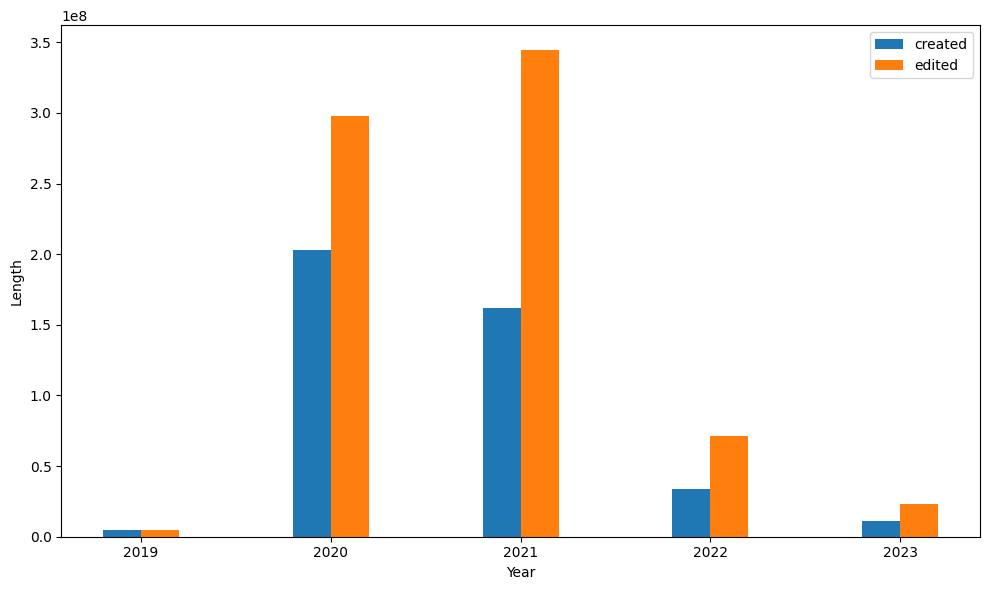

In [199]:
pl1 = BarPlotter(df_all_ai_roads_created_country.loc[df_all_ai_roads_created_country["country"] == "USA", :], df_all_ai_roads_edited_country.loc[df_all_ai_roads_edited_country["country"] == "USA", :],
                 x_column="year", y_column="sum(length)")
pl1.create_bar_plot(title=None, xlabel="Year", ylabel="Length")


# This chapter is useless so far

## Convert to Pandas DataFrame - AI buildings, AI roads (this chapter is useless so far)

In [ ]:
# # Filter AI blds
# df_blds = df.filter(df.tags_str.contains("microsoft/BuildingFootprints") | df.tags_str.contains("esri/Google_Africa_Buildings"))\
# .groupby("country", "editor", "year", "tags_str")\
# .agg(psf.sum("user_id"))\
# .withColumnRenamed("sum(user_id)", "count_u_id")\
# .sort(psf.col("count_u_id").desc())\
# .toPandas()


In [ ]:
# df_blds

,country,editor,year,tags_str,count_u_id
0,TUR,RapiD 1.1.9-tm.1,2023,"{building -> yes, source -> microsoft/Building...",1862607831910
1,IND,RapiD 1.1.9,2023,"{building -> yes, source -> microsoft/Building...",697575610154
2,IDN,JOSM/1.5 (18583 en),2023,"{building -> yes, source -> microsoft/Building...",167757823842
3,USA,RapiD 1.1.9,2023,"{building -> yes, source -> microsoft/Building...",116856923771
4,SYR,RapiD 1.1.9-tm.1,2023,"{building -> yes, source -> microsoft/Building...",97647827025
...,...,...,...,...,...
24984,GBR,StreetComplete 50.2,2023,"{building -> house, source -> microsoft/Buildi...",7329
24985,GBR,StreetComplete 50.2,2023,"{building -> detached, source -> microsoft/Bui...",7329
24986,GBR,StreetComplete 50.2,2023,"{building -> apartments, source -> microsoft/B...",7329
24987,GBR,RapiD 1.1.9,2023,"{building -> yes, source -> microsoft/Building...",7329


In [ ]:
# df_blds.notna().all(axis=1)


0        True
1        True
2        True
3        True
4        True
         ... 
24984    True
24985    True
24986    True
24987    True
24988    True
Length: 24989, dtype: bool

In [ ]:
# & (psf.col("road") == 1)


In [ ]:
# # Filter AI roads
# df_roads = df_roads.filter(((df_roads.tags_str.contains("mapwithai") | df_roads.tags_str.contains("MapWithAI") | df_roads.tags_str.contains("#nsroadimport")) & (df_roads.tags_str.contains("highway")))
#                            | (df_roads.hashtags_un.contains("#mapwithai") | df_roads.hashtags_un.contains("#nsroadimport")))\
#     .groupby("country", "editor", "year", "tags_str", "hashtags_un", "length")\
#     .agg(psf.sum("country"))\
#     .withColumnRenamed("sum(country)", "count_country")\
#     .sort(psf.col("count_country").desc())\
#     .toPandas()


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "c:\Users\milan\general_py_venv\lib\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "c:\Users\milan\general_py_venv\lib\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# df_roads


,country,editor,year,tags_str,hashtags_un,length,count_osm_id
0,TZA,JOSM/1.5 (18646 en),2023,{},"#Tanzania,#mapwithai",0,3883303105856
1,TZA,JOSM/1.5 (18583 en),2023,{},"#Tanzania,#mapwithai",0,2204724899226
2,IND,RapiD 1.1.9-tm.1,2023,{},"#India,#mapwithai",0,1786006015589
3,IND,JOSM/1.5 (18427 en),2023,{},"#India,#mapwithai",0,1006969338360
4,TZA,JOSM/1.5 (18463 en),2023,{},"#Tanzania,#mapwithai",0,841542487332
...,...,...,...,...,...,...,...
82556,USA,JOSM/1.5 (18700 en),2023,"{highway -> residential, tiger:county -> Orang...","#buildingmapping,#mapwithai",329,13331490
82557,USA,JOSM/1.5 (18700 en),2023,"{highway -> residential, tiger:county -> Orang...","#buildingmapping,#mapwithai",340,13303745
82558,USA,JOSM/1.5 (18700 en),2023,"{highway -> residential, tiger:county -> Orang...","#buildingmapping,#mapwithai",399,13303745
82559,USA,JOSM/1.5 (18565 en),2023,"{highway -> tertiary, tiger:county -> Orange, ...","#buildingmapping,#mapwithai",697,13300336
